# Let's find out the netflix movies!!!
## And how they are formed!!

## Import Libraries & Font & File

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [33]:
#Only for publishing
import warnings
warnings.filterwarnings('ignore')

In [34]:
plt.rc('font', family='Arial Unicode MS') # For MacOS
mpl.rcParams['axes.unicode_minus'] = False  

In [35]:
#Bring file into the notebook
nf = pd.read_csv('data/netflix_titles.csv')

## Observe & Ananyze Data 

In [36]:
1#Analyze the heads of the data
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
#do not abbreviate the columns
pd.set_option('display.max_columns', None)
nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
#make new dataframe with this nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()
nf_genres = nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts().to_frame().reset_index()
nf_genres


#if movie or tv show has genre, it will be 1, if not, it will be 0
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique()

#make new column for each genre and make new dataframe
for genre in nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().unique():
    nf[genre] = nf['listed_in'].str.contains(genre).astype(int)

nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Documentaries,International,Dramas,Mysteries,Crime,Action & Adventure,Docuseries,Reality,Romantic,Comedies,Horror,Children & Family,Independent,British,Spanish-Language,Thrillers,Music & Musicals,Sci-Fi & Fantasy,Kids',Classic,Anime Features,Sports,Anime Series,Korean,Science & Nature,Teen,Cult,Faith & Spirituality,LGBTQ,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,Classic & Cult
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
#divide date_added into year by comma
nf['year_added'] = nf['date_added'].str.split(',').str[1].str.strip()
nf.head(5)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Documentaries,International,Dramas,Mysteries,Crime,Action & Adventure,Docuseries,Reality,Romantic,Comedies,Horror,Children & Family,Independent,British,Spanish-Language,Thrillers,Music & Musicals,Sci-Fi & Fantasy,Kids',Classic,Anime Features,Sports,Anime Series,Korean,Science & Nature,Teen,Cult,Faith & Spirituality,LGBTQ,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,Classic & Cult,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021


In [40]:
#release year desc
nf['release_year'].value_counts().sort_index(ascending=False)


2021     592
2020     953
2019    1030
2018    1147
2017    1032
        ... 
1945       4
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 74, dtype: int64

In [41]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   show_id                       8807 non-null   object
 1   type                          8807 non-null   object
 2   title                         8807 non-null   object
 3   director                      6173 non-null   object
 4   cast                          7982 non-null   object
 5   country                       7976 non-null   object
 6   date_added                    8797 non-null   object
 7   release_year                  8807 non-null   int64 
 8   rating                        8803 non-null   object
 9   duration                      8804 non-null   object
 10  listed_in                     8807 non-null   object
 11  description                   8807 non-null   object
 12  Documentaries                 8807 non-null   int64 
 13  International     

## Cleaning Data

In [42]:
#fill in the missing values
nf['director'].fillna('Not Specified', inplace=True)
nf['cast'].fillna('Not Specified', inplace=True)
nf['country'].fillna('Not Specified', inplace=True)
nf['date_added'].fillna('Not Specified', inplace=True)
nf['rating'].fillna('No Rating', inplace=True)


In [43]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   show_id                       8807 non-null   object
 1   type                          8807 non-null   object
 2   title                         8807 non-null   object
 3   director                      8807 non-null   object
 4   cast                          8807 non-null   object
 5   country                       8807 non-null   object
 6   date_added                    8807 non-null   object
 7   release_year                  8807 non-null   int64 
 8   rating                        8807 non-null   object
 9   duration                      8804 non-null   object
 10  listed_in                     8807 non-null   object
 11  description                   8807 non-null   object
 12  Documentaries                 8807 non-null   int64 
 13  International     

In [44]:
#check duplicates
nf.duplicated('title')


0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

## Netflix Colors

### I will use Netflix colors to make the plots more attractive

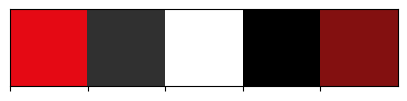

In [45]:
#netflix color palette
netflix_palette = ['#E50914','#303030','#FFFFFF', '#000000','#831010']

#show netflix color palette
sns.palplot(netflix_palette)


## Movies vs TV Shows

In [46]:
#find the number of movies and tv shows
nf['type'].value_counts()

#find the number of movies and tv shows pie chart use plotly, color manually
fig = px.pie(nf, values=nf['type'].value_counts(), names=nf['type'].value_counts().index, color_discrete_sequence=netflix_palette)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Number of Movies and TV Shows')
fig.show()





Almost 70% of the content is movies and 30% is TV Shows

In [47]:
#all added movies and tvshows by year
nf_r_all = nf['release_year'].value_counts().sort_index(ascending=False)

#yearly added movies by year, only movies in type
nf_r_movies = nf[nf['type'] == 'Movie']
nf_r_movies['release_year'].value_counts().sort_index(ascending=False)


#yearly added tv shows by year, only movies in type
nf_r_tv = nf[nf['type'] == 'TV Show']
nf_r_tv['release_year'].value_counts().sort_index(ascending=False)

#make graph by nf_r_all, nf_movies and nf_tv by line graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=nf_r_all.index, y=nf_r_all.values, name='All', line=dict(color=netflix_palette[0], width=4)))
fig.add_trace(go.Scatter(x=nf_r_movies['release_year'].value_counts().sort_index(ascending=False).index, y=nf_r_movies['release_year'].value_counts().sort_index(ascending=False).values, name='Movies', line=dict(color=netflix_palette[1], width=4)))
fig.add_trace(go.Scatter(x=nf_r_tv['release_year'].value_counts().sort_index(ascending=False).index, y=nf_r_tv['release_year'].value_counts().sort_index(ascending=False).values, name='TV Shows', line=dict(color=netflix_palette[4], width=4)))
fig.update_layout(title_text='Number of Movies and TV Shows by Release Year')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of Movies and TV Shows')
fig.show()

2019 and 2020 was peak year of release of content

I think this is because of the pandemic, which suppressed people from making Movies and TV Shows

In [48]:
#number of movies added each year, number of tv shows added each year, number of movies and tv shows added each year
fig = go.Figure()
fig.add_trace(go.Scatter(x=nf[nf['type'] == 'Movie'].groupby('year_added').count().reset_index()['year_added'], y=nf[nf['type'] == 'Movie'].groupby('year_added').count().reset_index()['title'], name='Movies Added', line_color=netflix_palette[0]))
fig.add_trace(go.Scatter(x=nf[nf['type'] == 'TV Show'].groupby('year_added').count().reset_index()['year_added'], y=nf[nf['type'] == 'TV Show'].groupby('year_added').count().reset_index()['title'], name='TV Shows Added', line_color=netflix_palette[1]))
fig.add_trace(go.Scatter(x=nf.groupby('year_added').count().reset_index()['year_added'], y=nf.groupby('year_added').count().reset_index()['title'], name='Total Added', line_color=netflix_palette[4]))
fig.update_layout(title_text='Number of Movies and TV Shows Added by Year')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Year Added')
#y axis name
fig.update_yaxes(title_text='Number of Movies and TV Shows Added')
fig.show()

Also, added contents are similar with released contents.

## Genre

In [49]:
#find genres of movies and tv shows
nf['listed_in'].value_counts()

#with the commma, we can split the genres
nf['listed_in'].str.split(',').explode().value_counts()

#find the number of movies and tv shows by genre
nf['listed_in'].str.split(',').explode().value_counts()

#remove the space in front of the genre
nf['listed_in'].str.split(',').explode().str.strip().value_counts()

#find the number of movies and tv shows by genre
nf['listed_in'].str.split(',').explode().str.strip().value_counts()

#remove if there is TV Shows, Movies, Tv in the genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').value_counts()

#remove space in front of the genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().value_counts()

#drop blank genre
nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts()

#make graph of the number of movies and tv shows by genre with plotly
#opposite color
fig = px.bar(nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color=nf['listed_in'].str.split(',').explode().str.strip().str.replace('TV Shows', '').str.replace('Movies', '').str.replace('TV', '').str.strip().replace('', np.nan).dropna().value_counts(), color_continuous_scale=netflix_palette[::-1])
fig.update_layout(title_text='Number of Movies and TV Shows by Genre')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis label
fig.update_xaxes(title_text='Genre')
fig.show()


International Movies are the most popular genre

In [50]:
#graph of different genres by release year
fig = px.line(nf.groupby('release_year').sum().reset_index(), x='release_year', y=nf.groupby('release_year').sum().reset_index().columns[1:])
fig.update_layout(title_text='Number of Movies and TV Shows by Release Year by Genre')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Number of Movies and TV Shows')
fig.show()

Similar trend of release and added contents

## Find Genre trend

In [51]:
#group by release year and find the different genres count
nf.groupby('release_year').sum().reset_index()


,release_year,Documentaries,International,Dramas,Mysteries,Crime,Action & Adventure,Docuseries,Reality,Romantic,Comedies,Horror,Children & Family,Independent,British,Spanish-Language,Thrillers,Music & Musicals,Sci-Fi & Fantasy,Kids',Classic,Anime Features,Sports,Anime Series,Korean,Science & Nature,Teen,Cult,Faith & Spirituality,LGBTQ,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,Classic & Cult
0,1925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1942,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
2,1943,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1944,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
4,1945,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2017,172,464,362,9,54,97,39,15,94,221,51,55,113,34,12,71,33,27,53,1,6,29,10,25,7,5,2,10,16,68,10,1
70,2018,120,530,413,15,79,109,61,36,103,260,62,69,131,37,27,90,43,49,64,3,8,27,24,18,14,8,3,15,13,75,16,2
71,2019,104,483,376,16,92,79,47,42,112,234,50,82,76,26,31,87,48,34,59,3,6,25,18,19,8,14,3,8,13,57,8,3
72,2020,77,453,322,27,87,78,74,55,107,238,46,83,46,33,28,52,37,20,63,3,3,17,21,17,15,11,3,5,17,48,7,3


In [52]:
#group by release year and find the average genre
nf.groupby('release_year').sum().reset_index()

#make graph of the average genre by release year just 10 years
fig = px.line(nf.groupby('release_year').sum().reset_index().iloc[-10:], x='release_year', y=nf.groupby('release_year').sum().reset_index().iloc[-10:].columns[1:])
fig.update_layout(title_text='Sum of Genre by Release Year')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Sum of Genre')
fig.show()



International Movies are most popular genre in 10 years, never changed

In [53]:
#group by year added and find the average genre exclude release year
nf.groupby('year_added').sum().reset_index().drop('release_year', axis=1)

#make graph of the average genre by year added just 10 years
fig = px.line(nf.groupby('year_added').sum().reset_index().iloc[-10:].drop('release_year', axis=1), x='year_added', y=nf.groupby('year_added').sum().reset_index().iloc[-10:].drop('release_year', axis=1).columns[1:])
fig.update_layout(title_text='Sum of Genre by Year Added')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Year Added')
#y axis name
fig.update_yaxes(title_text='Sum of Genre')
fig.show()



Sum of Genres by add year is also similar, but seems they updated their contents a lot after 2015

(Maybe their databse is after 2015)

## Rating Categories

In [54]:
#count the number of ratings
nf['rating'].value_counts()

#excclude last 3 ratings
nf['rating'].value_counts()[:-3]

#make graph of the number of ratings
fig = px.bar(nf['rating'].value_counts()[:-3], color=nf['rating'].value_counts()[:-3], color_continuous_scale=netflix_palette[::-1])
fig.update_layout(title_text='Number of Ratings')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis label
fig.update_xaxes(title_text='Rating')
fig.show()


## Find rating trend

In [55]:
#make column TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR' and if is same with the rating, then 1, else 0
nf['TV-MA'] = np.where(nf['rating'] == 'TV-MA', 1, 0)
nf['TV-14'] = np.where(nf['rating'] == 'TV-14', 1, 0)
nf['TV-PG'] = np.where(nf['rating'] == 'TV-PG', 1, 0)
nf['R'] = np.where(nf['rating'] == 'R', 1, 0)
nf['PG-13'] = np.where(nf['rating'] == 'PG-13', 1, 0)
nf['TV-Y7'] = np.where(nf['rating'] == 'TV-Y7', 1, 0)
nf['TV-Y'] = np.where(nf['rating'] == 'TV-Y', 1, 0)
nf['PG'] = np.where(nf['rating'] == 'PG', 1, 0)
nf['TV-G'] = np.where(nf['rating'] == 'TV-G', 1, 0)
nf['NR'] = np.where(nf['rating'] == 'NR', 1, 0)
nf['G'] = np.where(nf['rating'] == 'G', 1, 0)
nf['TV-Y7-FV'] = np.where(nf['rating'] == 'TV-Y7-FV', 1, 0)
nf['No Rating'] = np.where(nf['rating'] == 'No Rating', 1, 0)
nf['NC-17'] = np.where(nf['rating'] == 'NC-17', 1, 0)
nf['UR'] = np.where(nf['rating'] == 'UR', 1, 0)

nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Documentaries,International,Dramas,Mysteries,Crime,Action & Adventure,Docuseries,Reality,Romantic,Comedies,Horror,Children & Family,Independent,British,Spanish-Language,Thrillers,Music & Musicals,Sci-Fi & Fantasy,Kids',Classic,Anime Features,Sports,Anime Series,Korean,Science & Nature,Teen,Cult,Faith & Spirituality,LGBTQ,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,Classic & Cult,year_added,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,TV-Y7-FV,No Rating,NC-17,UR
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
#yearly count of each rating, TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR'
nf_rating_ya = nf.groupby('year_added')['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR'].sum().reset_index()
nf_rating_ry = nf.groupby('release_year')['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G','NR', 'G', 'TV-Y7-FV', 'No Rating', 'NC-17', 'UR'].sum().reset_index()

In [57]:
nf_rating_ry

,release_year,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,TV-Y7-FV,No Rating,NC-17,UR
0,1925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1942,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1943,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
3,1944,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1945,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2017,451,251,111,73,32,37,31,15,26,2,1,0,1,0,0
70,2018,549,268,105,52,30,40,41,31,26,1,2,1,0,1,0
71,2019,500,252,98,39,19,36,50,12,23,0,1,0,0,0,0
72,2020,469,174,80,48,21,41,59,15,45,0,1,0,0,0,0


In [61]:
#make graph of the average rating by release year just 10 years by nf_rating_ry
fig = px.line(nf_rating_ry.iloc[-10:], x='release_year', y=nf_rating_ry.iloc[-10:].columns[1:])
fig.update_layout(title_text='Sum of Rating by Release Year')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Release Year')
#y axis name
fig.update_yaxes(title_text='Average Rating')
fig.show()

In [62]:
#make graph of the average rating by release year just 10 years by nf_rating
fig = px.line(nf_rating_ya.iloc[-10:], x='year_added', y=nf_rating_ya.iloc[-10:].columns[1:])
fig.update_layout(title_text='Sum of Rating by Year Added')
#remove background
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
#x axis name
fig.update_xaxes(title_text='Year Added')
#y axis name
fig.update_yaxes(title_text='Average Rating')
fig.show()

Two graphs are also similar graph.

TV-MA is most rated, followed by TV-14